# Teste técnico NeuralMed

Nível: Senior NLP

Dataset: Os dados que utilizaremos para este teste são um conjunto de tweets em português disponibilizados no Kaggle: [link](https://www.kaggle.com/datasets/augustop/portuguese-tweets-for-sentiment-analysis)

Com esses dados responda as questões abaixo:
1. Com esse dataset tão variado que tipo de soluções acha possível implementar?

2. Imagine que tenha que desenvolver dois serviços:

Identificar se o tweet se refere a um produto

Identificar se ele cita alguma vaga de emprego


Escolha um dos projetos e mapeie os requisitos e as necessidades para o desenvolvimento, que tarefas teria que fazer, quais técnicas usaria e porque.

3. É possível desenvolver alguma parte do item acima com os dados que você tem? Se sim, resolva o possível no tempo disponibilizado.

4. Faça um modelo de análise de sentimentos dos tweets. 

Dado o tempo de desenvolvimento o item 3 torna-se opcional, apenas comente o que poderia ter feito se tivesse mais tempo. As partes de código do desafio podem ser entregues no próprio Kaggle ou utilizando o Colab da Google. Para as questões pode entregar no formato que achar melhor.


# Considerações e Respostas

## Considerações

O dataset utilizado determinou o sentimento utilizando as técnicas apresentadas por Go et al. (2009), que considera os emoticons presentes nos tweets. Por conta disso, o modelo desenvolvido aqui tem como objetivo gerar as mesmas classificações dos modelos utilizados para a classificação de sentimento.

## Respostas 

`1. Com esse dataset tão variado que tipo de soluções acha possível implementar?`

R: Dados textuais, principalmente sem um domínio específico, podem conter uma grande quantidade de dados que, se processados da maneira correta, podem gerar informações valiosas. A lista abaixo apresenta algumas das possibilidades:

* Identificação de grupos e interesses
* Monitoramento de atividades
* Acompanhamento de campanhas
* Detecção de tendências
* Identificação de associações de dados
* Direcionamento de esforços
* Treinamento/refinamento de modelos com palavras específicas

** Se a coleta dos dados contemplar dados geográficos, é possível utilizar esse dado para aprimorar os resultados, gerando novos dados e até obter dados mais precisos.




`Desenvolvimento de serviço para identificar se tweet fala sobre um determinado produto na última seção`



# Preparando Colab

In [ ]:
! pip install kaggle -q
! pip install unidecode -q

from google.colab import files
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download augustop/portuguese-tweets-for-sentiment-analysis
! unzip /content/portuguese-tweets-for-sentiment-analysis.zip

     |████████████████████████████████| 235 kB 5.3 MB/s 


Saving kaggle.json to kaggle.json
 98% 219M/224M [00:01<00:00, 154MB/s]
100% 224M/224M [00:01<00:00, 130MB/s]
Archive:  /content/portuguese-tweets-for-sentiment-analysis.zip
  inflating: NoThemeTweets.csv       
  inflating: TestDatasets/Test.csv   
  inflating: TestDatasets/Test3classes.csv  
  inflating: TestDatasets/TestTema.csv  
  inflating: TrainingDatasets/Train100.csv  
  inflating: TrainingDatasets/Train200.csv  
  inflating: TrainingDatasets/Train300.csv  
  inflating: TrainingDatasets/Train3Classes.csv  
  inflating: TrainingDatasets/Train400.csv  
  inflating: TrainingDatasets/Train50.csv  
  inflating: TrainingDatasets/Train500.csv  
  inflating: TrainingDatasets/TrainTema.csv  
  inflating: TweetsNeutralHash.csv   
  inflating: TweetsNeutralNews.csv   
  inflating: TweetsWithTheme.csv     
  inflating: testdatasets/Test.csv   
  inflating: testdatasets/Test3classes.csv  
  inflating: testdatasets/TestTema.csv  
  inflating: trainingdatasets/Train100.csv  
  inflating: tra

# Carregando bibliotecas

In [ ]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import re
from nltk import tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
import unidecode
from sklearn.feature_extraction.text import TfidfVectorizer


nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

# Avaliação sintática de sentimentos


O modelo utilizado foi Regressão Logística. Outros modelos de classificação também podem ser utilizados e devem apresentar resultados similares.
Esse modelo foi escolhido pela simplicidade para o desafio.

## Carregando dataset

In [ ]:
df = pd.read_csv("/content/TrainingDatasets/Train500.csv", sep=";")
df

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)
...,...,...,...,...,...
499995,1039281130304880640,@joaomedina hahahahahha capaz viu :( ele é chato,Mon Sep 10 22:35:05 +0000 2018,0,:(
499996,1039281126987231232,eu so queria as fotos que tirei nesse feriado :(,Mon Sep 10 22:35:04 +0000 2018,0,:(
499997,1039281117017325568,@yasmimleal19 viajou hoje :(,Mon Sep 10 22:35:01 +0000 2018,0,:(
499998,1039281105977917440,triste saber que o jimin e os meninos tem bast...,Mon Sep 10 22:34:59 +0000 2018,0,:(


In [ ]:
df.sentiment.value_counts().tolist(), df.query_used.value_counts().tolist() # checando dataset balanceado e proporção entre sentiment vs query_used

([250000, 250000], [250000, 250000])

In [ ]:
df = df.drop("query_used", axis=1)

## Ajustar texto  1

O tweets foram limpos da seguinte forma:


1.   Citações do estilo @user foram removidas
2.   Urls e links foram removidos
3.   Sequência ":)" e ":(" foram removidas - Manter essa sequência pode permitir a criação de técnicas com 100% de acerto
4.   Espaços em branco no começo e final foram removidos




In [ ]:
tweets = [t.lower() for t in df.tweet_text] # to lower()
tweets = [re.sub(r'@[a-zA-Z0-9_]{0,15}', ' ', t) for t in tweets] # remove @users
tweets = [re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', ' ', t) for t in tweets] # remove urls
tweets = [t.replace(":(", "").replace(":)", "") for t in tweets] # removing :) :(
tweets = [t.strip() for t in tweets] # strip white spaces

df['tweet'] = tweets

In [ ]:
def classificar_texto(model, texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=100)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])

    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                                  texto[coluna_classificacao],
                                                                  random_state = 42)
    
    
    model.fit(treino, classe_treino)
    acuracia = model.score(teste, classe_teste)
    return acuracia

def paretar(dados, coluna, qtd):
    todas_palavras = ' '.join([texto for texto in dados[coluna]])

    token_espaco = tokenize.WhitespaceTokenizer()
    token_frase = token_espaco.tokenize(todas_palavras)
    freq = nltk.FreqDist(token_frase)
    df_freq = pd.DataFrame({"palavra": list(freq.keys()), "freq": list(freq.values())})
    top = df_freq.nlargest(columns='freq', n = qtd)

    plt.figure(figsize=(12,8))

    ax = sns.barplot(data=top, x= "palavra", y = "freq")
    ax.set(ylabel="Contagem")
    plt.show()

Acurácia 0.67388


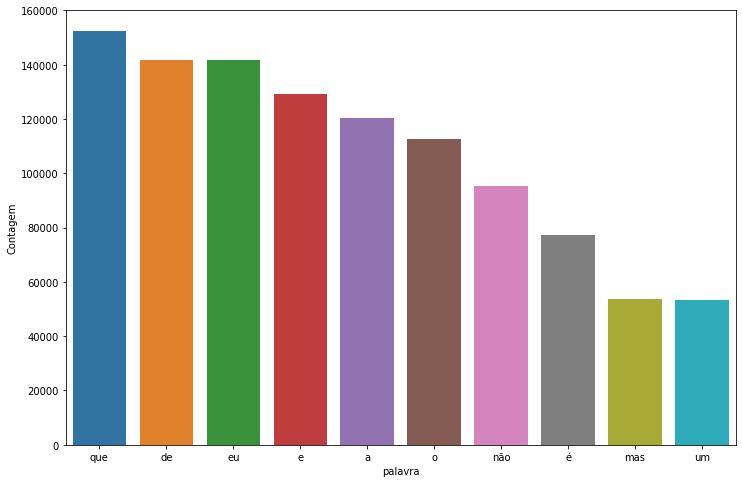

In [ ]:
model = LogisticRegression()
v = classificar_texto(model, df, "tweet", "sentiment")
print("Acurácia", v)
paretar(df, "tweet", 10)

## Ajustar texto 2

A lista abaixo apresenta as técnicas aplicadas na segunda avaliação

1.   Stop words do português foram removidas
2.   Pontuações foram removidas
3.   Palavras foram stemmarizadas



In [ ]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)


palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
pontuacao_stopwords = pontuacao+palavras_irrelevantes

token_pontuacao = tokenize.WordPunctTokenizer()
stemmer = nltk.RSLPStemmer()

frases_novas = []
for opiniao in tweets:
    new = []
    opiniao = unidecode.unidecode(opiniao)
    palavras = token_pontuacao.tokenize(opiniao)
    for palavra in palavras:
        if palavra not in pontuacao_stopwords:
            new.append(stemmer.stem(palavra))
    
    new = ' '.join(new)
    frases_novas.append(new)

df['tweet'] = frases_novas

Acurácia 0.663872


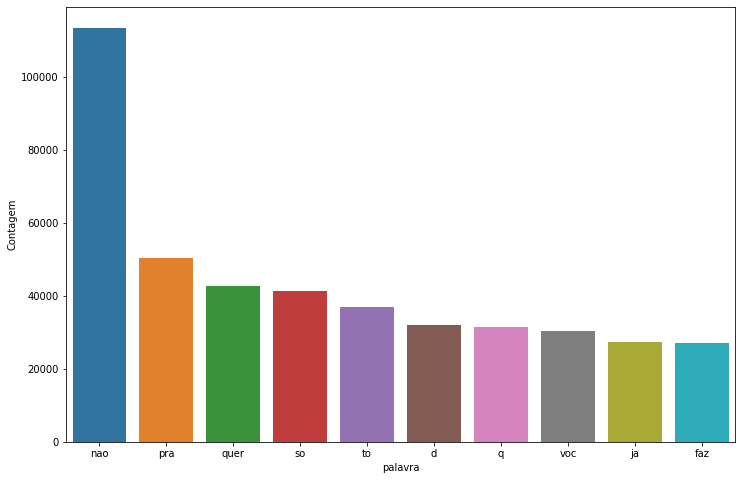

In [ ]:
model = LogisticRegression()
v = classificar_texto(model, df, "tweet", "sentiment")
print("Acurácia", v)
paretar(df, "tweet", 10)

## TF-IDF + Ngram

Técnica TF-IDF foi utilizada em conjunto com NGram para gerar entradas mais significativas para o modelo.

In [ ]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1, 2))

vetor_tfidf_bruto = tfidf.fit_transform(df["tweet"])

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf_bruto, df["sentiment"], random_state=42)
    
regressao_logistica = LogisticRegression(max_iter=300)
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
acuracia


0.780864

Apenas visualizando os ngrams que mais contribuiram para avaliações positivas e negativas

In [ ]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names()
)

pesos.nlargest(30, 0), pesos.nsmallest(30, 0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(                    0
 foo         13.305832
 feliz        7.378671
 parab        7.146632
 ola          7.081955
 bom          6.691277
 boa          5.965751
 dol caiu     5.793228
 val          5.729678
 otim         5.695806
 opinia       5.554893
 gt gt        5.475397
 canal        5.437318
 dic          5.389840
 vlw          5.286578
 quis         5.032814
 agradec      4.893941
 hah          4.849684
 ahahah       4.776947
 clar         4.748707
 heh          4.686005
 bacan        4.600521
 fras         4.586553
 legal        4.437851
 probl        4.397719
 ahah         4.376751
 nao esquec   4.331036
 recom        4.293189
 hahah        4.273703
 quer morr    4.261194
 xd           4.257448,                      0
 trist       -12.838095
 bar         -12.210434
 pox         -10.439373
 infeliz      -9.241940
 saudad       -9.183071
 sdd          -8.409898
 af           -8.004044
 aff          -7.748388
 gt           -7.708631
 tad          -7.624293
 quer         -6.886291

## Discussão

É possível que palavras escritas erradas, abreviações e gírias possam ter influenciado negativamente nos resultados obtidos. Dessa maneira, é recomendada a aplicação de técnicas para correção dos texto antes das avaliações.



# Avaliação com Embedding

O modelo [BERTimbau Base](https://huggingface.co/neuralmind/bert-base-portuguese-cased) foi utilizado para gerar o vetor de embedding dos tweets. Dois embeddings foram gerados para cada tweet, um com a frase original e um com o tweet passando pelo mesmo processo de limpeza feita na avaliação sintática 1.

As avaliações foram feitas considerando apenas uma porção dos tweets devido a restrições de memória e tempo.

## Código de embedding e download dos embeddings


Código utilizado para geração do embedding:

```
import pandas as pd
from transformers import BertTokenizer
from transformers import AutoModel
import torch
import json
import time
import threading
import re

df = pd.read_csv("./TrainingDatasets/Train500.csv", sep=";")


total_threads = 40
RESULT = {}
threadLock = threading.Lock()


models = []
tokenizers = []
for i in range(total_threads):
    print(i)
    model = AutoModel.from_pretrained('neuralmind/bert-base-portuguese-cased')
    tokenizer = BertTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased', do_lower_case=True)
    #model = 1
    #tokenizer = 1
    models.append(model)
    tokenizers.append(tokenizer)


def embeda(model, tokenizer, idd, texto):
    #print(model, tokenizer, idd, texto)
     texto = texto.lower()
     # Os passos abaixo foram executados apenas na obtenção do embedding com os tweets limpos
     # texto = re.sub(r'@[a-zA-Z0-9_]{0,15}', ' ', texto)
     # texto = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', ' ', texto)
     # texto = texto.replace(":(", "").replace(":)", "")
     # texto = texto.strip()
     input_ids = tokenizer.encode(texto, return_tensors='pt', max_length=512)

     with torch.no_grad():
         outs = model(input_ids)
         cls_out = outs['last_hidden_state'][0][0].tolist()

         while not threadLock.acquire():
             time.sleep(1)
         RESULT[str(idd)] = cls_out
         threadLock.release()


t_ativas = []
for i in range(len(df)):
    if i>0 and i%100==0:
        print(i, len(df))
    #    break

    #if i==1023:
    #    break

    x = threading.Thread(target=embeda, args=(models[i%total_threads], tokenizers[i%total_threads], df.iloc[i]['id'], df.iloc[i]['tweet_text'],))
    x.start()
    t_ativas.append(x)

    if len(t_ativas)==total_threads:
        for t in t_ativas:
            t.join()
        t_ativas = []

for t in t_ativas:
    t.join()
t_ativas = []

with open("embds.json", 'w') as f:
    f.write(json.dumps(RESULT))
```



In [ ]:
! wget http://www.lrc.ic.unicamp.br/~ferraroni/embds_nm.zip
! unzip embds_nm.zip

--2022-04-17 18:59:38--  http://www.lrc.ic.unicamp.br/~ferraroni/embds_nm.zip
Resolving www.lrc.ic.unicamp.br (www.lrc.ic.unicamp.br)... 143.106.7.163
Connecting to www.lrc.ic.unicamp.br (www.lrc.ic.unicamp.br)|143.106.7.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7095606955 (6.6G) [application/zip]
Saving to: ‘embds_nm.zip’

embds_nm.zip        100%[===================>]   6.61G  23.4MB/s    in 5m 0s   

2022-04-17 19:04:39 (22.5 MB/s) - ‘embds_nm.zip’ saved [7095606955/7095606955]

Archive:  embds_nm.zip
  inflating: embds_tweets_line       
  inflating: embds_cleaned_line      


## Bibliotecas

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
# from sklearn.neural_network import MLPClassifier # O modelo pode ser esse. Redes pequenas (10, 10) devem ter bons resultados também

import numpy as np
import json

## Avaliação com tweets limpos

In [ ]:
inputs_cleaned = []
outputs_cleaned = []
lines_total = 0
with open('./embds_cleaned_line', 'r') as f:
    line = f.readline()
    while line:
        lines_total +=1 
        if lines_total%100==0:
            print(lines_total)
        idd, embd = line.split("\t")
        embd = json.loads(embd)
        sentiment = df.query(f"id=={idd}").sentiment.values[0]
        inputs_cleaned.append(embd)
        outputs_cleaned.append(sentiment)
        line = f.readline()

        if lines_total==30000:
            break

sum(outputs_cleaned), len(outputs_cleaned) # Balanceado o suficiente

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

(15662, 30000)

In [ ]:
entrada = np.array([np.array(e) for e in inputs_cleaned])
saida = np.array(outputs_cleaned)
train_features, test_features, train_labels, test_labels = train_test_split(entrada, saida, test_size = 0.25, random_state = 42)

model = LogisticRegression(max_iter=1000) # Aproximadamente 25 segundos
model.fit(train_features, train_labels)
predictions = model.predict(test_features)

print("Accuracy:", accuracy_score(test_labels, predictions))
print("F1 Weighted:", f1_score(test_labels, predictions, average='weighted'))
print("Precision Weighted:", precision_score(test_labels, predictions, average='weighted'))

Accuracy: 0.8097333333333333
F1 Weighted: 0.8097696174948927
Precision Weighted: 0.8098301377646031


## Avaliação com tweets originais

In [ ]:

inputs_tweets = []
outputs_tweets = []
lines_total = 0
with open('./embds_tweets_line', 'r') as f:
    line = f.readline()
    while line:
        lines_total +=1 
        if lines_total%100==0:
            print(lines_total)
        idd, embd = line.split("\t")
        embd = json.loads(embd)
        sentiment = df.query(f"id=={idd}").sentiment.values[0]
        inputs_tweets.append(embd)
        outputs_tweets.append(sentiment)
        line = f.readline()

        if lines_total==30000:
            break

sum(outputs_tweets), len(outputs_tweets) # Balanceado o suficiente

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

(15662, 30000)

In [ ]:
entrada = np.array([np.array(e) for e in inputs_tweets])
saida = np.array(outputs_tweets)
train_features, test_features, train_labels, test_labels = train_test_split(entrada, saida, test_size = 0.25, random_state = 42)

model = LogisticRegression(max_iter=100)
model.fit(train_features, train_labels)
predictions = model.predict(test_features)

print("Accuracy:", accuracy_score(test_labels, predictions))
print("F1 Weighted:", f1_score(test_labels, predictions, average='weighted'))
print("Precision Weighted:", precision_score(test_labels, predictions, average='weighted'))

Accuracy: 0.9672
F1 Weighted: 0.9671868915391909
Precision Weighted: 0.9672601150001867


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Discussão final


Resultados obtidos


|   Tipo de dataset    | Resultado |
|----------------------|-----------|
| Sintática 1          |    0.67   |
| Sintática 2          |    0.66   |
| TF-IDF+NGram         |    0.78   |
| Embedding Limpo      |    0.80   |
| Embedding Sem limpar |    0.96   |


As abordagens puramente sintáticas tiveram resultados de ~0.66, enquanto a utilização de TF-IDF+Ngram atingiu ~0.78. Dessa maneira, devido a simplicidade de utilização e velocidade de processamento, essa abordagem se torna aceitável em diversos domínios.

As abordagens, considerando o Embedding das sentenças, conseguiram atingir acurácia de 0.80 nos tweets que foram limpos e 0.96 nos tweets originais. Os resultados indicam que a utilização do BERT para obtenção do embedding é uma boa solução. O resultado obtido com os tweets originais+embedding indica que o modelo conseguiu representar bem os dados, provavelmente entendendo bem o significado dos emoticons para geração dos embeddings, que aliado a regressão logística conseguiu resultados muito similares a abordagem escolhida para a classificação de sentimento original.

A boa geração de embedding com BERT nesse cenário se deve aos dados utilizados durante seu treinamento com o dataset BrWaC.

# Serviço para produto


Objetivo: Acomapanhar produto no twitter.


Estágios:



1.   Entendimento do case e levantamento de requisitos
    * Sinônimos
    * Produtos Similares
    * Produtos concorrentes
    * Áreas que se relacionam
    * Grupo de usuários
    * Regiões de atuação
    * Efetividade em cada região
    * Abordagem em cada região
    * Hashtags (produto específico, campanhas e eventos)
2.   Obtenção de tweets
    * Tweets históricos
    * Mecanismo para acompanhamento de novos tweets
3. Filtro por tweets de interesse
    * Todos devem falar de algum item de interesse (Produto específico, concorrente e afins)
    * Agrupamento (Geográfico, campanha)
    * Diversos modelos e técnicas podem ser utilizados para o agrupamento e identificação de padrões
4. Classificação de sentimento
    * Abordagem com embedding utilizada nesse documento pode ser utilizada para essa tarefa
5. Classificação de intenção
    * Falar que vai comprar
    * Falar que Gosta
    * Falar que não quer mais
    * Falar que quebrou/estragou
    * Técnicas com palavra chave/modelos de embedding+classificação
6. Compilação dos dados
    * Gráficos
    * Relações mapeadas
    * Destaques
    * Mapas
    * Técnicas de visualização devem ser exploradas para cada dado



Possibilidades

* Acompanhar frequência de postagens
* Acompanhar sentimento - Alinhar com campanhas
* Acompanhar intenção
* Avaliação de concorrentes
* Relacionar intenção com campanhas e resultados obtidos
* Identificar palavras e áreas relacionadas
* Regiões/grupos de maior engajamento/utilização do produto
* Mais

Abaixo é apresentado um exemplo de classificação de sentimentos utilizando o modelo treinado nas seções anteriores.

In [ ]:
! pip install transformers -q

     |████████████████████████████████| 4.0 MB 5.7 MB/s 
     |████████████████████████████████| 596 kB 49.3 MB/s 
     |████████████████████████████████| 77 kB 5.1 MB/s 
     |████████████████████████████████| 895 kB 46.1 MB/s 
     |████████████████████████████████| 6.6 MB 28.3 MB/s 


In [ ]:
import pandas as pd
from nltk import tokenize
import re
from transformers import BertTokenizer
from transformers import AutoModel
import torch
import numpy as np
import nltk

df = pd.read_csv("/content/TrainingDatasets/Train500.csv", sep=";")

In [ ]:
founds = []
for tweet in df['tweet_text']:
    
    tweet = tweet.lower()
    tweet_eval = re.sub(r'@[a-zA-Z0-9_]{0,15}', ' ', tweet)
    if "coca" in tweet_eval:
        founds.append(tweet)

len(founds)

182

In [ ]:
model_bert = AutoModel.from_pretrained('neuralmind/bert-base-portuguese-cased')
tokenizer_bert = BertTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased', do_lower_case=True)

Downloading:   0%|          | 0.00/647 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/418M [00:00<?, ?B/s]

Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/205k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

In [ ]:
def get_cls(t):
    input_ids = tokenizer_bert.encode(t, return_tensors='pt', max_length=512)

    with torch.no_grad():
        outs = model_bert(input_ids)
        cls_out = outs['last_hidden_state'][0][0].tolist()

        return np.array(cls_out)

for t in founds:
    print(model.predict([get_cls(t)])[0], t)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


1 tanta cocaina pra cheirar e eu prefiro cheirar teu cangote.. :)
1 to aqui na cozinha comendo hambúrguer e tomando coca :)
1 @elianaplh44 provavelmente a coca faz mal pra saúde mais do que a cerveja hauahaua mas pode sim, só porque amo você :d
1 filme, pipoca, coca-cola, balinha de iogurte, boa noite :d
1 @baiano715 felizona kkkkkkk beleza só falta marcar a coca né :)
1 vim para a escola porque pensei que o pen de matemática era as 10 30 :) agora vou ficar 1 h a coca los na escola
1 @carolhimura @carolinedaher @paulobaccarat @fonseca_aline ah sou hipocrita da pior espécie! não tomo coca normal a mais de 20 anos, e café só com sucralose! :-)
1 derrubei coca cola na minha apostila :)
1 @cadilheeee podias também mudar a ementa, passam a servir pizza e mac com direito a chocolates e pintarolas, ah clarooo, coca cola no meio das aulas de filosofia :))
1 @dinoju_ ti amu ti amu ti amu mas vc não bebe coca cola então vou te convidar pra jogar bola :)
1 será que vai rolar uma "coke cbd"? :) ve

In [ ]:
! pip install unidecode -q

In [ ]:
%matplotlib inline

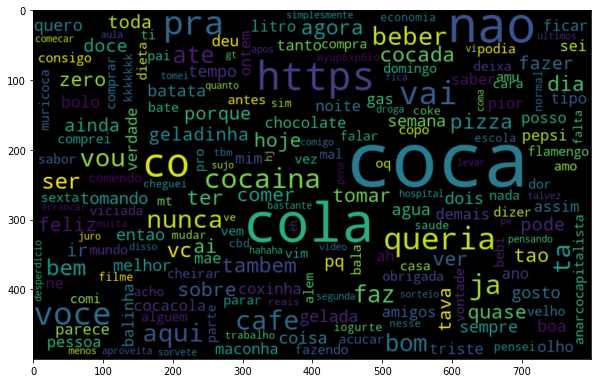

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from string import punctuation
import unidecode

pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

token_pontuacao = tokenize.WordPunctTokenizer()

palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
pontuacao_stopwords = pontuacao+palavras_irrelevantes

frases_novas = []
for tweet in founds:
    new = []
    tweet = unidecode.unidecode(tweet)
    palavras = token_pontuacao.tokenize(tweet)
    for palavra in palavras:
        if palavra not in pontuacao_stopwords:
            new.append(palavra)
    
    new = ' '.join(new)
    frases_novas.append(new)

todas_palavras = ' '.join(frases_novas)

nuvem = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

plt.figure(figsize=(10,7))
plt.imshow(nuvem, interpolation='bilinear')
plt.show()